# 3주차 Neural Network 과제는 인공신경망을 논리게이트부터 차례대로 쌓아올려 직접 짜보는 것입니다.
# 중간 중간 남겨진 주석을 따라 코드를 완성시켜 주세요

## 논리 게이트 구현

In [1]:
## AND gate 구현해주세요
# w1, w2 => 가중치(weight)를 의미하는 변수
# theta : threshold

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

def NAND(x1, x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1


def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

## 활성함수 구현

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 입력할 샘플 데이터를 만들고 확인합니다.
x = np.array([-1, 1, 2])
print("input : ", x)

# 입력 값이 임계값(0)을 넘기는지 판단합니다.
y = x>0
print("Logic : ", y)

# 논리(boolean)형태를 정수형으로 바꾸어 0과 1로 나타냅니다.
y = y.astype(np.int)
print("Boolean : ", y)

input :  [-1  1  2]
Logic :  [False  True  True]
Boolean :  [0 1 1]


D:\ProgramFiles\Anaconda3-2020.02-Windows-x86_64.exe\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [3]:
# STEP 함수 구현
def step_function(x):
    return np.where(x>0, 1, 0)


# 함수가 제대로 만들어 졌는지 값을 출력해봅니다.
print(step_function(-1))	# 0
print(step_function(0.5))	# 1
print(step_function(500000))	# 1

0
1
1


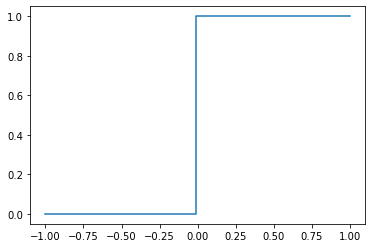

In [4]:
# 구현한 계단 함수의 값을 바탕으로 그래프를 그려봅시다.
x = np.linspace(-1, 1, 100)
plt.step(x, step_function(x))
plt.show()

[0.00669285 0.26894142 0.5        0.52497919 0.99330715 1.        ]


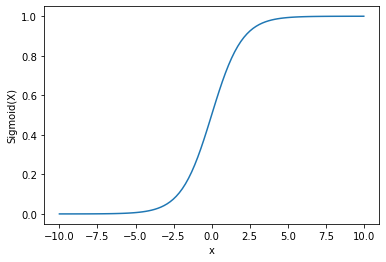

In [5]:
# Sigmoid 함수 구현
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-5, -1, 0, 0.1, 5, 500000])
print(sigmoid(x))

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

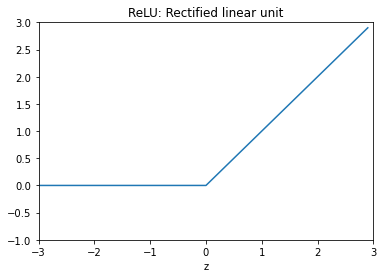

<Figure size 432x288 with 0 Axes>

In [6]:
# ReLU 함수 구현
def ReLU(x):
    return np.maximum(0, x)

x = np.arange(-3, 3, .1)
y = ReLU(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_ylim([-1.0, 3.0])
ax.set_xlim([-3.0, 3.0])
#ax.grid(True)
ax.set_xlabel('z')
ax.set_title('ReLU: Rectified linear unit')

plt.show()
fig = plt.gcf()

## 신경망 구현

In [7]:
def init_network():
    """
    W1,W2 : 가중치
    B1,B2 : 편향
    값은 일단 마음대로 지정한 값이니 신경쓰지 않으셔도 됩니다.
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.3, 0.7], [0.2, 0.1, 0.6, 0.8]]) # 3 x 4
    network['B1'] = np.array([0.11, 0.12, 0.13, 0.14]) # 4개
    network['W2'] = np.array([[0.1, 0.5], [0.2, 0.6], [0.3, 0.4], [0.35, 0.35]]) # 4 x 2
    network['B2'] = np.array([0.1, 0.5]) # 2개

    return network

In [8]:
# 순전파 함수 정의
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['B1'], network['B2']
    
    # 아래 빈칸 채워주세요
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2

    y = a2
    return y

In [9]:
# 네트워크 제작
network = init_network()

# 샘플 입력 데이터
x = np.array([1, 0.5, 0.7])

# 순전파 실행
y = forward(network, x)
print(y)

[0.81956037 1.7977893 ]


## 직접 신경망 만들어보기

In [82]:
# 랜덤 시드(Random Seed)를 고정합니다.
np.random.seed(405)

# X: 입력(inputs)
X = np.array([
    [0, 0]
    ,[0, 1]
    ,[1, 0]
    ,[1, 1]
])

# 편향(bias)
b = 1

# Y: 타겟값(target, correct outputs)
Y= np.array([[0],[1],[1],[1]])

In [83]:
# 시그모이드 함수
# net: 입력과 가중치의 가중합
def sigmoid(net):
#위에서 구현한 코드 그대로
    return 1 / (1 + np.exp(-net))


# 시그모이드 함수의 도함수 구현
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(net):
    sig = sigmoid(net)
    return sig*(1-sig)

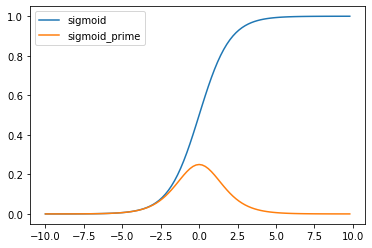

In [84]:
# 시그모이드 함수가 잘 생성되었는지 그래프를 출력해봅시다.
x_range = np.arange(-10., 10., 0.2)
y_range = np.array([sigmoid(x) for x in x_range])
y_prime = np.array([sigmoid_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='sigmoid')
plt.plot(x_range, y_prime, label='sigmoid_prime')
plt.legend()
plt.show();

In [85]:
# 초기 가중치
W = np.array([0.40316676, -0.44345216]).reshape(-1,1)

# 입력 데이터와 가중치 연산
Z = np.dot(X, W)+b
"""
array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])
"""

'\narray([[1.        ],\n       [0.55654784],\n       [1.40316676],\n       [0.9597146 ]])\n'

In [88]:
# A: 출력(activated outputs)
A = sigmoid(Z)
print(A)

"""
array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])
"""

[[0.73105858]
 [0.6356534 ]
 [0.80268592]
 [0.72306466]]


'\narray([[0.73105858],\n       [0.6356534 ],\n       [0.80268592],\n       [0.72306466]])\n'

## 미분한 값을 코드로 구현
=> 출력 오차를 줄이기 위한 역전파(경사하강법 이용)

경사 하강법(Gradient descent) : 손실 값이 최소가 되는 가중치(weight)를 찾는 방법
역전파 알고리즘 : 경사 하강법에 필요한 미분값을 빠르고 효율적으로 찾는 알고리즘

da = ∂E/∂A (MSE를 미분하여 나오는 값)
dz = ∂E/∂z
dw, db = 각각 가중치(weight), 편향(bias) 업데이트 값

In [90]:
def backpropagation(Y, A, Z):
    da = A-Y
    dz = da * sigmoid_prime(Z)
    dw = np.dot(X.T, dz)
    db = np.sum(da)
    
    print("dz : \n", dz, "\n")
    print("dw : \n", dw, "\n")
    print("db : \n", db, "\n")
    
    return dw,db

dw,db=backpropagation(Y, A, Z)


"""
dz :
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]]

dw :
 [[-0.08670498]
 [-0.13983613]]

db :
 [[-0.10753744]]
"""

dz : 
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]] 

dw : 
 [[-0.08670498]
 [-0.13983613]] 

db : 
 -0.10753743559028228 



'\ndz :\n [[ 0.14373484]\n [-0.084382  ]\n [-0.03125085]\n [-0.05545413]]\n\ndw :\n [[-0.08670498]\n [-0.13983613]]\n\ndb :\n [[-0.10753744]]\n'

In [91]:
print("기존 가중치: \n", W, "\n")
"""
기존 가중치:
 [[ 0.40316676]
 [-0.44345216]]
"""

기존 가중치: 
 [[ 0.40316676]
 [-0.44345216]] 



'\n기존 가중치:\n [[ 0.40316676]\n [-0.44345216]]\n'

In [92]:
# 가중치 업데이트(batch)
W += dw
b += db

print("업데이트 후 가중치: \n", W, "\n")
print("업데이트 후 bias: \n", b, "\n")

"""
업데이트 후 가중치:
 [[ 0.31646178]
 [-0.58328829]]

업데이트 후 bias:
 [[0.89246256]]
"""

업데이트 후 가중치: 
 [[ 0.31646178]
 [-0.58328829]] 

업데이트 후 bias: 
 0.8924625644097177 



'\n업데이트 후 가중치:\n [[ 0.31646178]\n [-0.58328829]]\n\n업데이트 후 bias:\n [[0.89246256]]\n'

In [93]:
## 최적 가중치 찾기
# 이미 입력 데이터와 타겟 출력은 윗 부분에서 선언함

# 가중치 초기화
# 아래 각주 코드 하나씩 실행하여 결과값 달라지는 확인해보시기 바랍니다

# W = 2 * np.random.random((2,1)) - 1
W =  [-0.79003947, 0.6826574 ]
# W = np.zeros((2,1))

b = 0

print('학습 전 가중치: \n', W)

# 가중치 업데이트 10,000회 (10,000 epoch)

for iteration in range(1000):

    # 순방향 전파
    Z = np.dot(X, W)+b
    A = sigmoid(Z)

    # 역방향 전파(기울기 계산)
    backpropagation(Y, A, Z)

#     W=W.reshape(2,1)
    W += dw
    b += db

print('학습 후 가중치: \n', W, "\n")
print('학습 후 bias: \n', b, "\n")
print('학습 후 예측값: \n', A.round(3), "\n")

"""
학습 후 가중치:
 [[5.92060487]
 [5.92082351]]

학습 후 bias:
 [[-2.59025899]]

학습 후 예측값:
 [[0.07 ]
 [0.965]
 [0.965]
 [1.   ]]
"""

학습 전 가중치: 
 [-0.79003947, 0.6826574]
dz : 
 [[ 0.125       0.14814271  0.06702585  0.1179547 ]
 [-0.125      -0.07485244 -0.14769035 -0.131326  ]
 [-0.125      -0.07485244 -0.14769035 -0.131326  ]
 [-0.125      -0.07485244 -0.14769035 -0.131326  ]] 

dw : 
 [[-0.25       -0.14970487 -0.29538071 -0.26265199]
 [-0.25       -0.14970487 -0.29538071 -0.26265199]] 

db : 
 -4.201312053439935 

dz : 
 [[ 0.11794407  0.11794407]
 [-0.14264122 -0.09370708]
 [-0.1441614  -0.08961525]
 [-0.09760509 -0.05092803]] 

dw : 
 [[-0.24176649 -0.14054329]
 [-0.24024631 -0.14463511]] 

db : 
 -2.427486846170603 

dz : 
 [[ 0.1103286   0.1103286 ]
 [-0.13296822 -0.11229583]
 [-0.13759943 -0.10446919]
 [-0.0781316  -0.0737772 ]] 

dw : 
 [[-0.21573103 -0.17824639]
 [-0.21109983 -0.18607302]] 

db : 
 -2.772154444341415 

dz : 
 [[ 0.1023242   0.1023242 ]
 [-0.1201482  -0.12860165]
 [-0.12868883 -0.11846357]
 [-0.06075249 -0.09924667]] 

dw : 
 [[-0.18944132 -0.21771024]
 [-0.18090069 -0.22784832]] 

db : 
 

 [[ 2.16413659e-15  2.16413659e-15]
 [-6.16471811e-18 -2.68842142e-17]
 [-2.58595061e-14 -1.12772796e-13]
 [-3.42681835e-24 -6.51717423e-23]] 

dw : 
 [[-2.58595061e-14 -1.12772796e-13]
 [-6.16472154e-18 -2.68842794e-17]] 

db : 
 -5.999999906959296 

dz : 
 [[ 1.74533519e-15  1.74533519e-15]
 [-4.81371361e-18 -2.09925102e-17]
 [-2.12942240e-14 -9.28636911e-14]
 [-2.45359352e-24 -4.66628075e-23]] 

dw : 
 [[-2.12942240e-14 -9.28636911e-14]
 [-4.81371606e-18 -2.09925568e-17]] 

db : 
 -5.999999916445466 

dz : 
 [[ 1.40757978e-15  1.40757978e-15]
 [-3.75878317e-18 -1.63919793e-17]
 [-1.75349047e-14 -7.64693739e-14]
 [-1.75676694e-24 -3.34104556e-23]] 

dw : 
 [[-1.75349047e-14 -7.64693739e-14]
 [-3.75878493e-18 -1.63920127e-17]] 

db : 
 -5.9999999249644524 

dz : 
 [[ 1.13518644e-15  1.13518644e-15]
 [-2.93504186e-18 -1.27996597e-17]
 [-1.44392622e-14 -6.29693379e-14]
 [-1.25784081e-24 -2.39218041e-23]] 

dw : 
 [[-1.44392622e-14 -6.29693379e-14]
 [-2.93504312e-18 -1.27996836e-17]] 

d

dz : 
 [[ 7.47879790e-26  7.47879790e-26]
 [-5.72031678e-30 -2.49461888e-29]
 [-9.21464428e-24 -4.01848821e-23]
 [-1.92744838e-40 -3.66565007e-39]] 

dw : 
 [[-9.21464428e-24 -4.01848821e-23]
 [-5.72031678e-30 -2.49461888e-29]] 

db : 
 -5.999999999999453 

dz : 
 [[ 6.03150882e-26  6.03150882e-26]
 [-4.46670330e-30 -1.94792051e-29]
 [-7.58787498e-24 -3.30905733e-23]
 [-1.38004831e-40 -2.62459645e-39]] 

dw : 
 [[-7.58787498e-24 -3.30905733e-23]
 [-4.46670330e-30 -1.94792051e-29]] 

db : 
 -5.999999999999509 

dz : 
 [[ 4.86429760e-26  4.86429760e-26]
 [-3.48782054e-30 -1.52103166e-29]
 [-6.24829836e-24 -2.72487060e-23]
 [-9.88111199e-41 -1.87920461e-39]] 

dw : 
 [[-6.24829836e-24 -2.72487060e-23]
 [-3.48782054e-30 -1.52103166e-29]] 

db : 
 -5.999999999999559 

dz : 
 [[ 3.92296387e-26  3.92296387e-26]
 [-2.72346097e-30 -1.18769596e-29]
 [-5.14521292e-24 -2.24381722e-23]
 [-7.07485192e-41 -1.34550589e-39]] 

dw : 
 [[-5.14521292e-24 -2.24381722e-23]
 [-2.72346097e-30 -1.18769596e-29]

dz : 
 [[ 2.33595278e-41  2.33595278e-41]
 [-8.38583503e-48 -3.65704613e-47]
 [-9.14077279e-38 -3.98627300e-37]
 [-1.58597815e-64 -3.01623689e-63]] 

dw : 
 [[-9.14077279e-38 -3.98627300e-37]
 [-8.38583503e-48 -3.65704613e-47]] 

db : 
 -6.0 

dz : 
 [[ 1.88390166e-41  1.88390166e-41]
 [-6.54807040e-48 -2.85560060e-47]
 [-7.52704489e-38 -3.28252944e-37]
 [-1.13555646e-64 -2.15961821e-63]] 

dw : 
 [[-7.52704489e-38 -3.28252944e-37]
 [-6.54807040e-48 -2.85560060e-47]] 

db : 
 -6.0 

dz : 
 [[ 1.51933100e-41  1.51933100e-41]
 [-5.11305384e-48 -2.22979270e-47]
 [-6.19820732e-38 -2.70302600e-37]
 [-8.13055636e-65 -1.54628133e-63]] 

dw : 
 [[-6.19820732e-38 -2.70302600e-37]
 [-5.11305384e-48 -2.22979270e-47]] 

db : 
 -6.0 

dz : 
 [[ 1.22531167e-41  1.22531167e-41]
 [-3.99252267e-48 -1.74113127e-47]
 [-5.10396504e-38 -2.22582910e-37]
 [-5.82145839e-65 -1.10713364e-63]] 

dw : 
 [[-5.10396504e-38 -2.22582910e-37]
 [-3.99252267e-48 -1.74113127e-47]] 

db : 
 -6.0 

dz : 
 [[ 9.88190649e-42


dz : 
 [[ 7.29619312e-57  7.29619312e-57]
 [-1.22934152e-65 -5.36113414e-65]
 [-9.06749350e-52 -3.95431605e-51]
 [-1.30500340e-88 -2.48187492e-87]] 

dw : 
 [[-9.06749350e-52 -3.95431605e-51]
 [-1.22934152e-65 -5.36113414e-65]] 

db : 
 -6.0 

dz : 
 [[ 5.88424153e-57  5.88424153e-57]
 [-9.59930023e-66 -4.18623591e-65]
 [-7.46670246e-52 -3.25621423e-51]
 [-9.34379227e-89 -1.77701635e-87]] 

dw : 
 [[-7.46670246e-52 -3.25621423e-51]
 [-9.59930023e-66 -4.18623591e-65]] 

db : 
 -6.0 

dz : 
 [[ 4.74552932e-57  4.74552932e-57]
 [-7.49560341e-66 -3.26881788e-65]
 [-6.14851784e-52 -2.68135651e-51]
 [-6.69013232e-89 -1.27233934e-87]] 

dw : 
 [[-6.14851784e-52 -2.68135651e-51]
 [-7.49560341e-66 -3.26881788e-65]] 

db : 
 -6.0 

dz : 
 [[ 3.82717949e-57  3.82717949e-57]
 [-5.85293399e-66 -2.55245298e-65]
 [-5.06304783e-52 -2.20798518e-51]
 [-4.79011831e-89 -9.10991844e-88]] 

dw : 
 [[-5.06304783e-52 -2.20798518e-51]
 [-5.85293399e-66 -2.55245298e-65]] 

db : 
 -6.0 

dz : 
 [[ 3.08654776e-5

dz : 
 [[ 5.12064897e-066  5.12064897e-066]
 [-3.64117078e-076 -1.58790740e-075]
 [-4.90188715e-060 -2.13770332e-059]
 [-7.88754510e-103 -1.50006509e-101]] 

dw : 
 [[-4.90188715e-60 -2.13770332e-59]
 [-3.64117078e-76 -1.58790740e-75]] 

db : 
 -6.0 

dz : 
 [[ 4.12970638e-066  4.12970638e-066]
 [-2.84320435e-076 -1.23991581e-075]
 [-4.03649948e-060 -1.76030947e-059]
 [-5.64746292e-103 -1.07404292e-101]] 

dw : 
 [[-4.03649948e-60 -1.76030947e-59]
 [-2.84320435e-76 -1.23991581e-75]] 

db : 
 -6.0 

dz : 
 [[ 3.33052997e-066  3.33052997e-066]
 [-2.22011310e-076 -9.68186950e-076]
 [-3.32388886e-060 -1.44954138e-059]
 [-4.04356958e-103 -7.69012093e-102]] 

dw : 
 [[-3.32388886e-60 -1.44954138e-59]
 [-2.22011310e-76 -9.68186950e-76]] 

db : 
 -6.0 

dz : 
 [[ 2.68600932e-066  2.68600932e-066]
 [-1.73357297e-076 -7.56007754e-076]
 [-2.73708375e-060 -1.19363683e-059]
 [-2.89518589e-103 -5.50610770e-102]] 

dw : 
 [[-2.73708375e-60 -1.19363683e-59]
 [-1.73357297e-76 -7.56007754e-76]] 

db : 


dz : 
 [[ 5.32003721e-079  5.32003721e-079]
 [-4.24675880e-091 -1.85200314e-090]
 [-9.21604640e-072 -4.01909968e-071]
 [-5.36592889e-123 -1.02050036e-121]] 

dw : 
 [[-9.21604640e-72 -4.01909968e-71]
 [-4.24675880e-91 -1.85200314e-90]] 

db : 
 -6.0 

dz : 
 [[ 4.29050922e-079  4.29050922e-079]
 [-3.31607711e-091 -1.44613469e-090]
 [-7.58902957e-072 -3.30956084e-071]
 [-3.84199191e-123 -7.30675750e-122]] 

dw : 
 [[-7.58902957e-72 -3.30956084e-71]
 [-3.31607711e-91 -1.44613469e-90]] 

db : 
 -6.0 

dz : 
 [[ 3.46021441e-079  3.46021441e-079]
 [-2.58935530e-091 -1.12921274e-090]
 [-6.24924912e-072 -2.72528523e-071]
 [-2.75085677e-123 -5.23162043e-122]] 

dw : 
 [[-6.24924912e-72 -2.72528523e-71]
 [-2.58935530e-91 -1.12921274e-90]] 

db : 
 -6.0 

dz : 
 [[ 2.79059737e-079  2.79059737e-079]
 [-2.02189534e-091 -8.81744574e-091]
 [-5.14599583e-072 -2.24415864e-071]
 [-1.96960669e-123 -3.74582738e-122]] 

dw : 
 [[-5.14599583e-72 -2.24415864e-71]
 [-2.02189534e-91 -8.81744574e-91]] 

db : 


dz : 
 [[ 6.43348121e-093  6.43348121e-093]
 [-4.17392265e-107 -1.82023944e-106]
 [-2.48394469e-084 -1.08324338e-083]
 [-1.29259746e-144 -2.45828113e-143]] 

dw : 
 [[-2.48394469e-084 -1.08324338e-083]
 [-4.17392265e-107 -1.82023944e-106]] 

db : 
 -6.0 

dz : 
 [[ 5.18848072e-093  5.18848072e-093]
 [-3.25920308e-107 -1.42133204e-106]
 [-2.04542478e-084 -8.92005717e-084]
 [-9.25496609e-145 -1.76012325e-143]] 

dw : 
 [[-2.04542478e-084 -8.92005717e-084]
 [-3.25920308e-107 -1.42133204e-106]] 

db : 
 -6.0 

dz : 
 [[ 4.18441141e-093  4.18441141e-093]
 [-2.54494527e-107 -1.10984562e-106]
 [-1.68432194e-084 -7.34529479e-084]
 [-6.62653299e-145 -1.26024393e-143]] 

dw : 
 [[-1.68432194e-084 -7.34529479e-084]
 [-2.54494527e-107 -1.10984562e-106]] 

db : 
 -6.0 

dz : 
 [[ 3.37464853e-093  3.37464853e-093]
 [-1.98721782e-107 -8.66621775e-107]
 [-1.38696882e-084 -6.04854370e-084]
 [-4.74458135e-145 -9.02331556e-144]] 

dw : 
 [[-1.38696882e-084 -6.04854370e-084]
 [-1.98721782e-107 -8.66621775

'\n학습 후 가중치:\n [[5.92060487]\n [5.92082351]]\n\n학습 후 bias:\n [[-2.59025899]]\n\n학습 후 예측값:\n [[0.07 ]\n [0.965]\n [0.965]\n [1.   ]]\n'

## IRIS DATA PERCEPTRON 학습예제

In [36]:
### 1. 필요한 패키지를 import 하고 Iris 데이터셋 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris 데이터를 DataFrame 형태로 불러옵니다.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


In [37]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 아래 제공된 전처리 코드를 참고하여 자신만의 전처리 코드를 작성해봅니다.

In [38]:

### 2. 데이터 전처리(Preprocessing) 및 시각화(Visualization)
# 50 setosa, 50 versicolor 데이터만 사용하여 이진 분류(Binary Classification) 문제를 풀어보겠습니다.

y = df.iloc[0:100, 4].values
y
"""
array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)
"""


"\narray(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',\n       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',\n       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',\n       'Iris-versicolor', 'Iris-versicol

In [39]:
# 타겟 레이블을 setosa = -1, versicolor = 1 로 바꾸기
y = np.where(y == 'Iris-setosa', -1, 1)
y
"""
array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
"""



'\narray([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,\n       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,\n       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])\n'

In [40]:
# 두 개의 특성(sepal length, petal length)만 사용
X = df.iloc[0:100, [0, 2]].values
X.shape
"""
(100, 2)
"""


'\n(100, 2)\n'

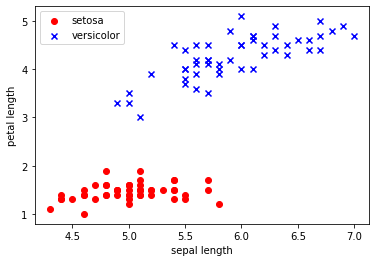

In [41]:

# 두 특성에 따라 데이터 시각화
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

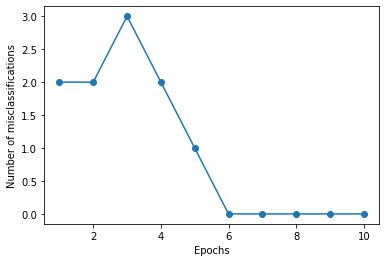

In [42]:
### 퍼셉트론(Perceptron)을 구현
class Perceptron:
    # niter = iteration 의 횟수입니다.
    # iteration에 대해서는 다음 강의에서 자세히 배울 것이므로 반복 횟수 정도로만 이해하셔도 충분합니다.
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """
        퍼셉트론을 학습시키는 코드입니다.

        X : 학습되는 데이터에 해당하는 벡터입니다.
        X.shape -> [샘플의 수, 특성의 수] 가 되어야 합니다.

        y : 타겟값입니다.
        y.shape -> [샘플의 수] 가 되어야 합니다.
        """

        # 초기 가중치는 [0, 0, 0] 으로 설정합니다.
        self.weight = np.zeros(1 + X.shape[1])

        # 오분류(mis-classification)된 데이터의 수
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """
        입력값을 받아 가중치, 편향과 연산해줍니다.
        """
        return np.dot(X, self.weight[1:]) + self.weight[0]                                                                    #코드 채워 넣기

    def predict(self, X):
        """
        학습 후 가중치를 바탕으로 데이터의 클래스를 예측합니다.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### 4. 퍼셉트론에 데이터 넣어 가중치를 학습
# 학습률(learning rate): 0.1, iteration(epoch): 10
# 퍼셉트론을 학습시키고 오분류(mis-classification)의 변화를 살펴보겠습니다.
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

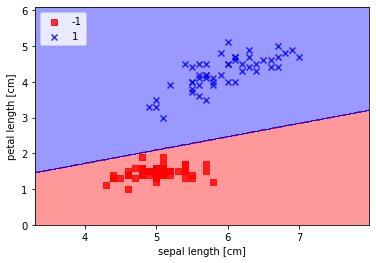

In [43]:
### 데이터가 잘 분류 되었는지 확인
# 퍼셉트론의 결정 경계를 확인해 보겠습니다.
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 그래프 요소를 세팅하여줍니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계면을 그려보겠습니다.
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, color=cmap(idx),
        marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## 고생하셨습니다